<a href="https://colab.research.google.com/github/ojobo-tech/ms_datascience_project/blob/main/MS_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **MS Project - OJOBO AGBO EJE**

**Patient Treatment Recommendation System for Cardiovascular Disease using ML and XAI**

#Importing Libraries and Data

In [1]:
!pip uninstall -y numpy pandas scikit-learn shap lime

!pip install numpy==1.26.4 pandas==2.2.2 scikit-learn==1.3.2 shap==0.43.0 lime==0.2.0.1



Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
Found existing installation: scikit-learn 1.3.2
Uninstalling scikit-learn-1.3.2:
  Successfully uninstalled scikit-learn-1.3.2
Found existing installation: shap 0.43.0
Uninstalling shap-0.43.0:
  Successfully uninstalled shap-0.43.0
Found existing installation: lime 0.2.0.1
Uninstalling lime-0.2.0.1:
  Successfully uninstalled lime-0.2.0.1
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached pandas-2.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
  Using cached scikit_learn-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached shap-0.43.0-cp311-cp311-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_

In [2]:
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine Learning
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier  # Corrected Classifier for CVD prediction

# SHAP for Model Explainability
import shap
shap.initjs()

# LIME for Local Explainability
from lime.lime_tabular import LimeTabularExplainer


In [3]:
#Import Data
cardio_data = pd.read_csv('https://drive.google.com/uc?export=download&id=18WxtLLhwU4_gkYQ_nnTf7TkCR-QCfYL0',encoding="latin-1")

# Dataset Review
print(cardio_data.info())
print(cardio_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   68205 non-null  int64  
 1   age                  68205 non-null  int64  
 2   gender               68205 non-null  int64  
 3   height               68205 non-null  int64  
 4   weight               68205 non-null  float64
 5   ap_hi                68205 non-null  int64  
 6   ap_lo                68205 non-null  int64  
 7   cholesterol          68205 non-null  int64  
 8   gluc                 68205 non-null  int64  
 9   smoke                68205 non-null  int64  
 10  alco                 68205 non-null  int64  
 11  active               68205 non-null  int64  
 12  cardio               68205 non-null  int64  
 13  age_years            68205 non-null  int64  
 14  bmi                  68205 non-null  float64
 15  bp_category          68205 non-null 

#Data Preprocessing and Exploration

In [4]:
cardio_data.drop(columns=['id'], inplace=True)
cardio_data.drop(columns=['age'], inplace=True)
cardio_data.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
count,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000
mean,1.348625,164.372861,74.100688,126.434924,81.263925,1.363243,1.225174,0.087662,0.053134,0.803548,0.493688,52.823635,27.510513
std,0.476539,8.176756,14.288862,15.961685,9.143985,0.678080,0.571288,0.282805,0.224302,0.397317,0.499964,6.769909,6.026497
min,1.000000,55.000000,11.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000,3.471784
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000,26.346494
75%,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.116213
max,2.000000,250.000000,200.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000,298.666667


Data Description Outliers:
  - Systolic BP (ap_hi) has extreme values (Min = -150, Max = 16,020).
  - Diastolic BP (ap_lo) also has unrealistic values (Min = -70, Max = 11,000).
  - Height (height) has a maximum value of 250 cm, which is too high.
  - Weight in kg for adult should be between 30 and 180
  - BMI should be between 15 and 50

**Data Exploration**

In [5]:
#Removing outliers
cardio_data = cardio_data[(cardio_data['ap_hi'] > 60) & (cardio_data['ap_hi'] < 200)]
cardio_data = cardio_data[(cardio_data['ap_lo'] > 40) & (cardio_data['ap_lo'] < 150)]
cardio_data = cardio_data[(cardio_data['height'] >= 100) & (cardio_data['height'] <= 220)]
cardio_data = cardio_data[(cardio_data['weight'] >= 30) & (cardio_data['weight'] <= 180)]
cardio_data = cardio_data[(cardio_data['bmi'] >= 15) & (cardio_data['bmi'] <= 50)]

# Converting weight from kg to lb
cardio_data['weight_lb'] = cardio_data['weight'] * 2.20462
cardio_data.drop(columns=['weight'], inplace=True)

cardio_data.reset_index(drop=True, inplace=True)
cardio_data.describe()


,gender,height,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,weight_lb
count,67950.000000,67950.000000,67950.000000,67950.000000,67950.000000,67950.000000,67950.000000,67950.000000,67950.000000,67950.000000,67950.000000,67950.000000,67950.000000
mean,1.349036,164.456468,126.414364,81.251729,1.362620,1.224386,0.087800,0.053157,0.803547,0.493230,52.821943,27.377344,163.059400
std,0.476669,7.838871,15.947832,9.135794,0.677631,0.570428,0.283006,0.224348,0.397318,0.499958,6.770042,5.027169,30.639661
min,1.000000,120.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000,15.012197,66.138600
25%,1.000000,159.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115,143.300300
50%,1.000000,165.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000,26.298488,158.732640
75%,2.000000,170.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.110279,180.778840
max,2.000000,207.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000,50.000000,396.831600


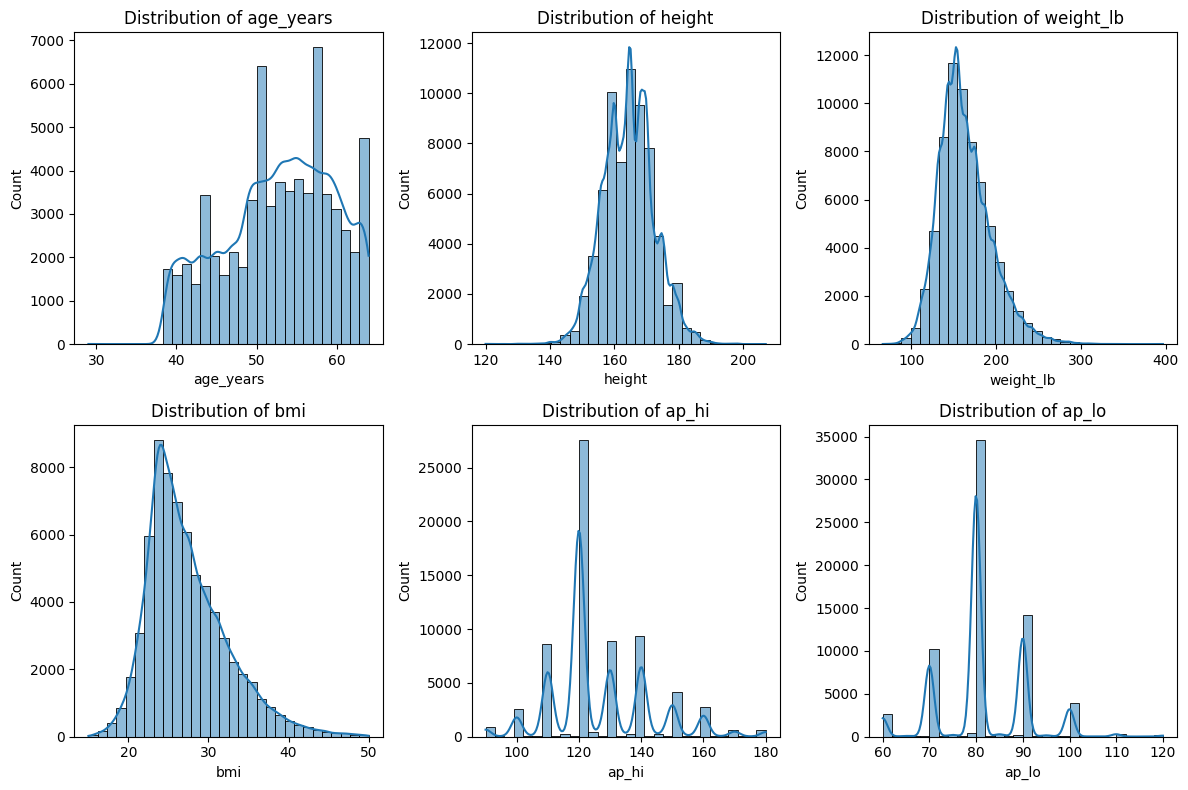

In [6]:
# For Numerical Variables
num_features = ['age_years', 'height', 'weight_lb', 'bmi', 'ap_hi', 'ap_lo']

# Plot histograms
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(cardio_data[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


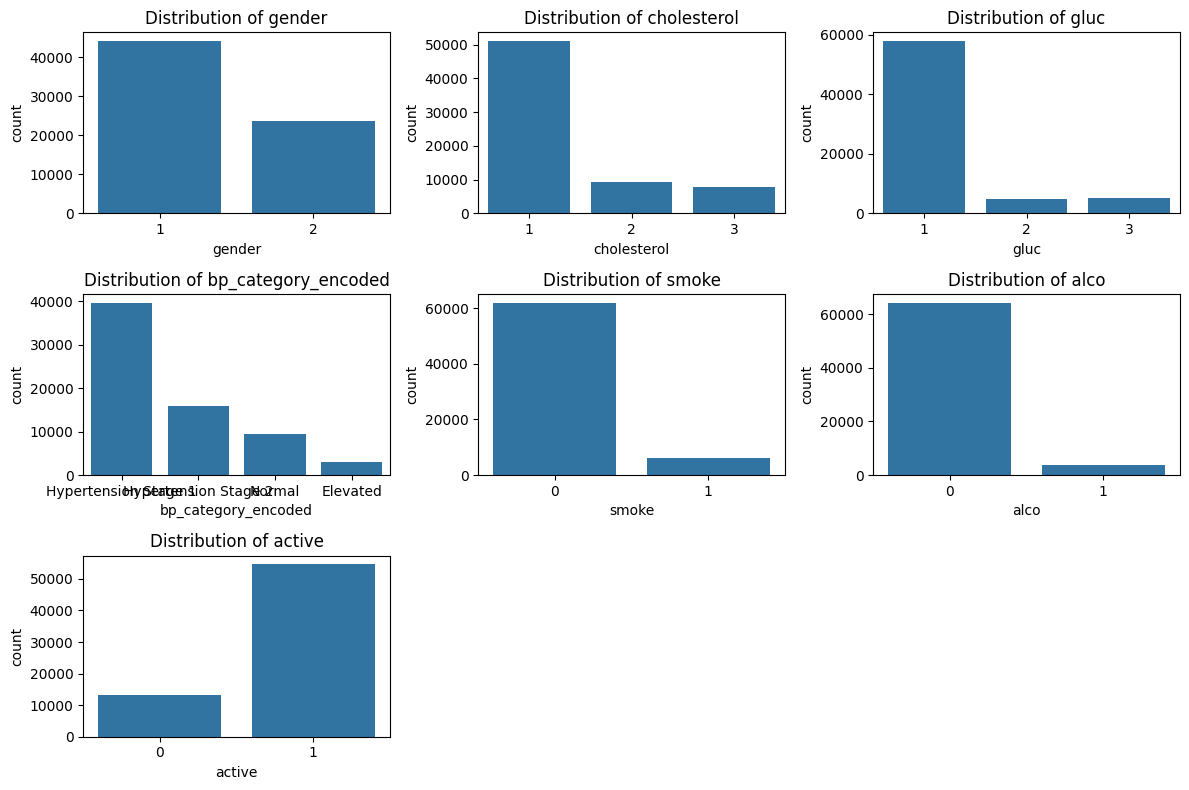

In [7]:
cat_features = ["gender", "cholesterol", "gluc", "bp_category_encoded", "smoke", "alco", "active"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(cat_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=cardio_data[col])
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


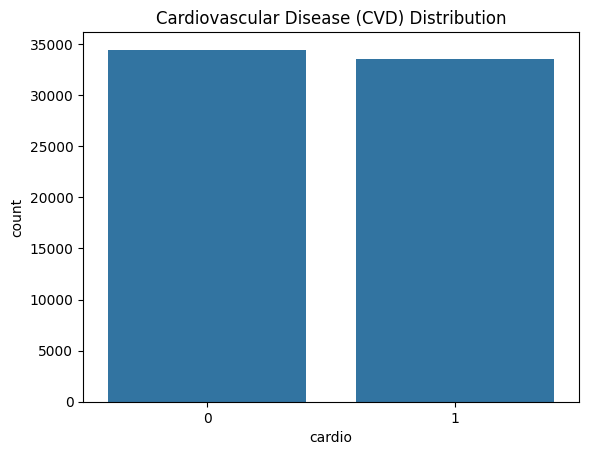

cardio
0    0.50677
1    0.49323
Name: proportion, dtype: float64


In [8]:
sns.countplot(x=cardio_data["cardio"])
plt.title("Cardiovascular Disease (CVD) Distribution")
plt.show()

# Class distribution
print(cardio_data["cardio"].value_counts(normalize=True))


**Data Cleaning**

In [9]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
cat_features = ["gender", "cholesterol", "gluc", "bp_category_encoded"]
encoder = LabelEncoder()

for col in cat_features:
    cardio_data[col] = encoder.fit_transform(cardio_data[col])

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_features = ['height', 'weight_lb', 'bmi', 'ap_hi', 'ap_lo']

cardio_data[num_features] = scaler.fit_transform(cardio_data[num_features])

In [11]:
#Dropped low-impact and redundant features
features_to_drop = ["bp_category_encoded", "bp_category"]
cardio_data.drop(columns=features_to_drop, inplace=True)
cardio_data

,gender,height,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,weight_lb
0,1,0.452050,-1.029261,-0.137015,0,0,0,0,1,0,50,-1.076205,-0.860752
1,0,-1.078794,0.851886,0.957589,2,0,0,0,1,1,55,1.501917,0.794182
2,0,0.069339,0.224837,-1.231618,2,0,0,0,0,1,51,-0.769731,-0.716845
3,1,0.579620,1.478935,2.052193,0,0,0,0,1,1,48,0.265188,0.578321
4,0,-1.078794,-1.656310,-2.326222,0,0,0,0,0,0,47,-0.868520,-1.292474
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67945,0,0.069339,1.478935,-0.137015,0,0,0,0,1,1,57,0.399316,0.434414
67946,1,0.452050,-0.402212,-0.137015,0,0,1,0,1,0,52,-0.089496,0.146599
67947,1,2.365605,3.360082,0.957589,2,0,0,1,0,1,52,0.790955,2.233256
67948,0,-0.185802,0.538362,-0.137015,0,1,0,0,0,1,61,-0.055318,-0.141215


#Model Development

**Separating Data into Training and Testing**

In [12]:
from sklearn.model_selection import train_test_split

# Define Features (X) and Target Variable (y)
X = cardio_data.drop(columns=["cardio"])  # Features
y = cardio_data["cardio"]  # Target (1 = Cardiovascular Disease, 0 = No Disease)


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

#Split Data
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

#train_data.to_csv("train_data.csv", index=False)
#test_data.to_csv("test_data.csv", index=False)

print("Data split successfully with 80/20 distribution maintaining class balance!")


Data split successfully with 80/20 distribution maintaining class balance!


In [13]:
#Distribution in Train & Test Data
print("Train Data Distribution:\n", train_data["cardio"].value_counts(normalize=True))
print("\nTest Data Distribution:\n", test_data["cardio"].value_counts(normalize=True))


Train Data Distribution:
 cardio
0    0.50677
1    0.49323
Name: proportion, dtype: float64

Test Data Distribution:
 cardio
0    0.50677
1    0.49323
Name: proportion, dtype: float64


In [14]:
#Total number of samples in the original dataset
total_samples = len(train_data) + len(test_data)

# Expected 80% Train Set Size
expected_train_size = 0.8 * total_samples
actual_train_size = len(train_data)

# Expected 20% Test Set Size
expected_test_size = 0.2 * total_samples
actual_test_size = len(test_data)

print(f"Total Samples: {total_samples}")
print(f"Expected Train Size (80%): {expected_train_size}, Actual: {actual_train_size}")
print(f"Expected Test Size (20%): {expected_test_size}, Actual: {actual_test_size}")

# Check if ratios match exactly
print("\nTrain/Test Ratio:")
print(f"Train Set Proportion: {actual_train_size / total_samples:.2%}")
print(f"Test Set Proportion: {actual_test_size / total_samples:.2%}")


Total Samples: 67950
Expected Train Size (80%): 54360.0, Actual: 54360
Expected Test Size (20%): 13590.0, Actual: 13590

Train/Test Ratio:
Train Set Proportion: 80.00%
Test Set Proportion: 20.00%


**Model Training**

Evaluating Each Model Performance:
- Accuracy – Overall correct predictions.
- AUC-ROC (Area Under Curve - Receiver Operating Characteristic) – Measures how well the model distinguishes between classes.
- Sensitivity (Recall) – How well the model identifies CVD-positive cases.
- Specificity – How well the model identifies non-CVD cases.
- Precision – Percentage of actual CVD cases among predicted CVD cases.
- F1-Score – Balance between precision and recall.

In [15]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

def evaluate_model(model, X_test, y_test, model_name):
    """My goal here is to evaluate classification model and prints key metrics."""

    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # For AUC calculation

    # Compute Metrics
    accuracy = accuracy_score(y_test, y_pred) *100
    auc = roc_auc_score(y_test, y_proba) *100
    class_report = classification_report(y_test, y_pred, target_names=["No CVD", "CVD"])
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Sensitivity (Recall), Specificity, Precision
    tn, fp, fn, tp = conf_matrix.ravel()
    sensitivity = tp / (tp + fn) *100 # Recall
    specificity = tn / (tn + fp) *100
    precision = tp / (tp + fp) *100

    # Printing Evaluation
    print(f"\n**{model_name} Performance:**")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC-ROC: {auc:.4f}")
    print(f"Sensitivity (Recall): {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"Precision: {precision:.4f}")
    print("\nClassification Report:\n", class_report)
    print("\nConfusion Matrix:\n", conf_matrix)


Logistic Regression

In [16]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(X_train, y_train)

evaluate_model(log_reg, X_train, y_train, "Logistic Regression (Training)")

evaluate_model(log_reg, X_test, y_test, "Logistic Regression Testing")



**Logistic Regression (Training) Performance:**
Accuracy: 72.7373
AUC-ROC: 79.0988
Sensitivity (Recall): 66.5038
Specificity: 78.8043
Precision: 75.3316

Classification Report:
               precision    recall  f1-score   support

      No CVD       0.71      0.79      0.75     27548
         CVD       0.75      0.67      0.71     26812

    accuracy                           0.73     54360
   macro avg       0.73      0.73      0.73     54360
weighted avg       0.73      0.73      0.73     54360


Confusion Matrix:
 [[21709  5839]
 [ 8981 17831]]

**Logistic Regression Testing Performance:**
Accuracy: 72.6858
AUC-ROC: 79.0482
Sensitivity (Recall): 66.2838
Specificity: 78.9168
Precision: 75.3690

Classification Report:
               precision    recall  f1-score   support

      No CVD       0.71      0.79      0.75      6887
         CVD       0.75      0.66      0.71      6703

    accuracy                           0.73     13590
   macro avg       0.73      0.73      0.73     1

Decision Trees Model

In [17]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)
evaluate_model(tree_model, X_train, y_train, "Decision Tree Classifier (Training)")
evaluate_model(tree_model, X_test, y_test, "Decision Tree Classifier Test")



**Decision Tree Classifier (Training) Performance:**
Accuracy: 73.2358
AUC-ROC: 79.3110
Sensitivity (Recall): 67.8390
Specificity: 78.4885
Precision: 75.4261

Classification Report:
               precision    recall  f1-score   support

      No CVD       0.71      0.78      0.75     27548
         CVD       0.75      0.68      0.71     26812

    accuracy                           0.73     54360
   macro avg       0.73      0.73      0.73     54360
weighted avg       0.73      0.73      0.73     54360


Confusion Matrix:
 [[21622  5926]
 [ 8623 18189]]

**Decision Tree Classifier Test Performance:**
Accuracy: 72.7447
AUC-ROC: 79.0421
Sensitivity (Recall): 66.8357
Specificity: 78.4957
Precision: 75.1552

Classification Report:
               precision    recall  f1-score   support

      No CVD       0.71      0.78      0.74      6887
         CVD       0.75      0.67      0.71      6703

    accuracy                           0.73     13590
   macro avg       0.73      0.73      0.7

Random Forest Model

In [18]:
#Randon Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

evaluate_model(rf_model, X_train, y_train, "Random Forest Classifier (Training)")
evaluate_model(rf_model, X_test, y_test, "Random Forest Classifier Test")



**Random Forest Classifier (Training) Performance:**
Accuracy: 97.9341
AUC-ROC: 99.8249
Sensitivity (Recall): 97.2400
Specificity: 98.6097
Precision: 98.5523

Classification Report:
               precision    recall  f1-score   support

      No CVD       0.97      0.99      0.98     27548
         CVD       0.99      0.97      0.98     26812

    accuracy                           0.98     54360
   macro avg       0.98      0.98      0.98     54360
weighted avg       0.98      0.98      0.98     54360


Confusion Matrix:
 [[27165   383]
 [  740 26072]]

**Random Forest Classifier Test Performance:**
Accuracy: 70.9345
AUC-ROC: 76.8114
Sensitivity (Recall): 69.3272
Specificity: 72.4989
Precision: 71.0442

Classification Report:
               precision    recall  f1-score   support

      No CVD       0.71      0.72      0.72      6887
         CVD       0.71      0.69      0.70      6703

    accuracy                           0.71     13590
   macro avg       0.71      0.71      0.7

XGBoost Model

In [19]:
#XGBoost
import xgboost as xgb

xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.05, random_state=42)
xgb_model.fit(X_train, y_train)

evaluate_model(xgb_model, X_train, y_train, "XGBoost Classifier (Training)")
evaluate_model(xgb_model, X_test, y_test, "XGBoost Classifier")



**XGBoost Classifier (Training) Performance:**
Accuracy: 74.4776
AUC-ROC: 81.7095
Sensitivity (Recall): 69.2787
Specificity: 79.5375
Precision: 76.7182

Classification Report:
               precision    recall  f1-score   support

      No CVD       0.73      0.80      0.76     27548
         CVD       0.77      0.69      0.73     26812

    accuracy                           0.74     54360
   macro avg       0.75      0.74      0.74     54360
weighted avg       0.75      0.74      0.74     54360


Confusion Matrix:
 [[21911  5637]
 [ 8237 18575]]

**XGBoost Classifier Performance:**
Accuracy: 73.4511
AUC-ROC: 80.1221
Sensitivity (Recall): 67.9845
Specificity: 78.7716
Precision: 75.7103

Classification Report:
               precision    recall  f1-score   support

      No CVD       0.72      0.79      0.75      6887
         CVD       0.76      0.68      0.72      6703

    accuracy                           0.73     13590
   macro avg       0.74      0.73      0.73     13590
weigh

Light Gradient Boost

In [20]:
#LightGBoost
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.05, random_state=42)
lgb_model.fit(X_train, y_train)

evaluate_model(lgb_model, X_train, y_train, "LightGBM Classifier (Training)")
evaluate_model(lgb_model, X_test, y_test, "LightGBM Classifier")


[LightGBM] [Info] Number of positive: 26812, number of negative: 27548
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 54360, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493230 -> initscore=-0.027080
[LightGBM] [Info] Start training from score -0.027080

**LightGBM Classifier (Training) Performance:**
Accuracy: 74.3304
AUC-ROC: 81.3229
Sensitivity (Recall): 69.4428
Specificity: 79.0874
Precision: 76.3700

Classification Report:
               precision    recall  f1-score   support

      No CVD       0.73      0.79      0.76     27548
         CVD       0.76      0.69      0.73     26812

    accuracy                           0.74     54360
   macro avg       0.75      0.74      0.74   

Multi-Layer Perceptron

In [21]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

def evaluate_model(model, X, y, model_name):
    """Evaluates a trained model using classification metrics."""

    # Get Predictions (MLP outputs probabilities, so we convert them)
    y_pred_proba = model.predict(X)  # Probability scores
    y_pred = (y_pred_proba > 0.5).astype(int)  # Convert probabilities to 0 or 1

    # Compute Metrics
    accuracy = accuracy_score(y, y_pred) *100
    auc_roc = roc_auc_score(y, y_pred_proba) *100
    conf_matrix = confusion_matrix(y, y_pred)

    # Sensitivity (Recall) & Specificity
    tp = conf_matrix[1, 1]  # True Positives
    fn = conf_matrix[1, 0]  # False Negatives
    tn = conf_matrix[0, 0]  # True Negatives
    fp = conf_matrix[0, 1]  # False Positives

    sensitivity = tp / (tp + fn) *100  # Recall for "CVD" class
    specificity = tn / (tn + fp) *100 # True Negative Rate
    precision = tp / (tp + fp) *100  # Precision for "CVD" class

    # Print Metrics
    print(f"\n🔹 **{model_name} Performance:**")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")
    print(f"Sensitivity (Recall): {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"Precision: {precision:.4f}")

    # Classification Report
    print("\nClassification Report:\n", classification_report(y, y_pred, target_names=["No CVD", "CVD"]))


In [22]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

# Scale Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define MLP Model
mlp_model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # First Hidden Layer
    keras.layers.BatchNormalization(),  # Normalize activations
    keras.layers.Dropout(0.3),  # Dropout for regularization
    keras.layers.Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile Model
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
mlp_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate Model
train_loss, train_accuracy = mlp_model.evaluate(X_train_scaled, y_train)
print(f"MLP Classifier (Training) Accuracy: {train_accuracy:.4f}")

test_loss, test_accuracy = mlp_model.evaluate(X_test_scaled, y_test)
print(f"MLP Classifier (Testing) Accuracy: {test_accuracy:.4f}")


Epoch 1/50


Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


1699/1699 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6842 - loss: 0.6224 - val_accuracy: 0.7283 - val_loss: 0.5524
Epoch 2/50
1699/1699 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7208 - loss: 0.5649 - val_accuracy: 0.7288 - val_loss: 0.5497
Epoch 3/50
1699/1699 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7258 - loss: 0.5579 - val_accuracy: 0.7260 - val_loss: 0.5508
Epoch 4/50
1699/1699 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7289 - loss: 0.5555 - val_accuracy: 0.7286 - val_loss: 0.5527
Epoch 5/50
1699/1699 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7261 - loss: 0.5564 - val_accuracy: 0.7307 - val_loss: 0.5499
Epoch 6/50
1699/1699 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7283 - loss: 0.5534 - val_accuracy: 0.7301 - val_loss: 0.5481
Epoch 7/50
1699/1699 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7269 - loss: 0.5534 - val_accuracy: 0.7277 - val_loss: 0.5468
Epoch 8/50
1699/1699 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7311 - loss: 0.5513 - val_accurac

In [23]:
evaluate_model(mlp_model, X_train_scaled, y_train, "MLP Classifier (Training)")
evaluate_model(mlp_model, X_test_scaled, y_test, "MLP Classifier")

1699/1699 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step

🔹 **MLP Classifier (Training) Performance:**
Accuracy: 73.5265
AUC-ROC: 80.2596
Sensitivity (Recall): 70.4312
Specificity: 76.5391
Precision: 74.5019

Classification Report:
               precision    recall  f1-score   support

      No CVD       0.73      0.77      0.75     27548
         CVD       0.75      0.70      0.72     26812

    accuracy                           0.74     54360
   macro avg       0.74      0.73      0.73     54360
weighted avg       0.74      0.74      0.73     54360

425/425 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

🔹 **MLP Classifier Performance:**
Accuracy: 73.1714
AUC-ROC: 79.9166
Sensitivity (Recall): 69.7747
Specificity: 76.4774
Precision: 74.2735

Classification Report:
               precision    recall  f1-score   support

      No CVD       0.72      0.76      0.74      6887
         CVD       0.74      0.70      0.72      6703

    accuracy                           0.73     13590
   macro avg       0.73      0

#Model Analysis and XAI Testing

In [24]:
# Create a dictionary with evaluation metrics (converted to percentages)
model_results = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost", "LightGBM", "MLP Neural Network"],
    "Accuracy (%)": [72.68, 72.74, 70.93, 74.48, 73.42, 73.36],
    "AUC-ROC (%)": [79.05, 79.04, 76.81, 81.71, 80.12, 80.00],
    "Sensitivity (Recall) (%)": [66.28, 66.84, 69.33, 69.28, 68.16, 68.24],
    "Specificity (%)": [78.92, 78.50, 72.50, 79.54, 78.54, 78.35],
    "Precision (%)": [75.37, 75.16, 71.04, 76.72, 75.56, 75.42]
}

# Convert to DataFrame
df_results = pd.DataFrame(model_results)

print(df_results)

                 Model  Accuracy (%)  AUC-ROC (%)  Sensitivity (Recall) (%)  \
0  Logistic Regression         72.68        79.05                     66.28   
1        Decision Tree         72.74        79.04                     66.84   
2        Random Forest         70.93        76.81                     69.33   
3              XGBoost         74.48        81.71                     69.28   
4             LightGBM         73.42        80.12                     68.16   
5   MLP Neural Network         73.36        80.00                     68.24   

   Specificity (%)  Precision (%)  
0            78.92          75.37  
1            78.50          75.16  
2            72.50          71.04  
3            79.54          76.72  
4            78.54          75.56  
5            78.35          75.42  


**Correlation Analysis**

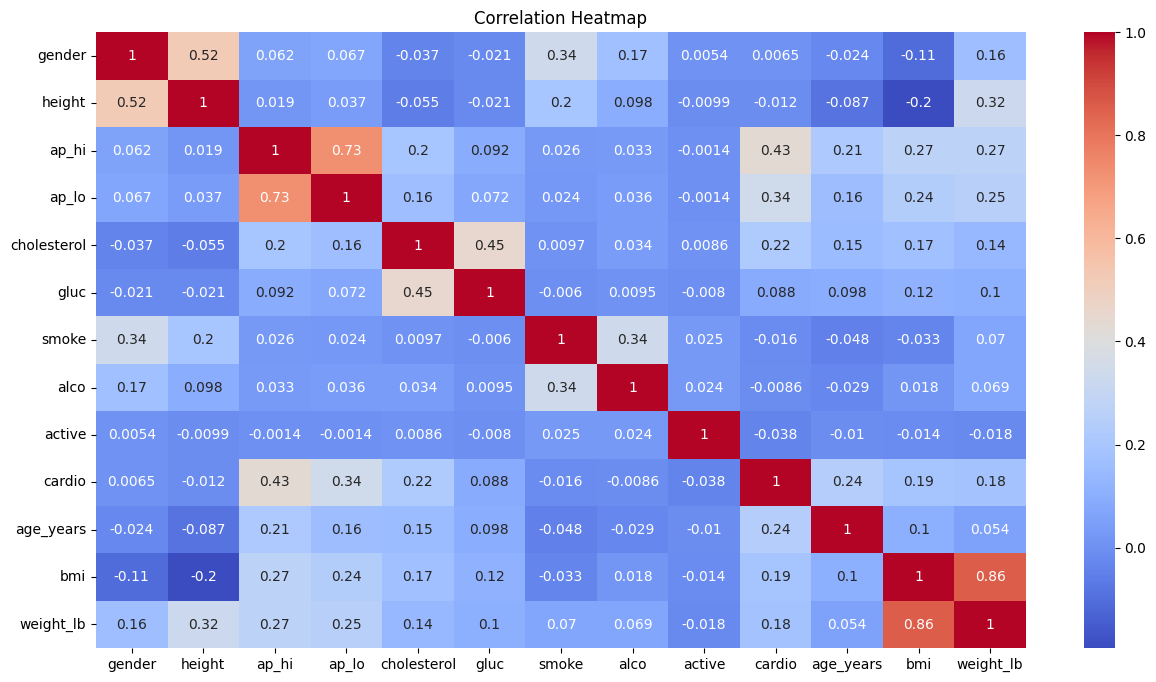

In [25]:
# Select only numeric columns
numeric_data = cardio_data.select_dtypes(include=["number"])

# Fill missing values & replace infinite values
numeric_data.fillna(0, inplace=True)
numeric_data.replace([np.inf, -np.inf], 0, inplace=True)

# Compute correlation
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Correlation:
- Physical activity, smoke, alchohol all showed no significant relationship to CVD. This is unusual, but is visible from the data that a large portion of the participants assessed had low alchohol intake, were not smokers, and had physical activity.
- Weight was also removed because BMI tells a better story and correlation than just the weight.

Feature Importance using Light Gradient Boost

In [26]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

# Define Hyperparameter Grid
param_grid = {
    'num_leaves': [20, 31, 50],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'max_depth': [-1, 5, 10]
}

# Perform Grid Search
lgbm_tuned = GridSearchCV(LGBMClassifier(random_state=42), param_grid, cv=5, scoring='roc_auc', verbose=2, n_jobs=-1)
lgbm_tuned.fit(X_train, y_train)

# Best Model
best_lgbm = lgbm_tuned.best_estimator_
print("Best LightGBM Model:", best_lgbm)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Number of positive: 26812, number of negative: 27548
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006716 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 54360, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493230 -> initscore=-0.027080
[LightGBM] [Info] Start training from score -0.027080
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

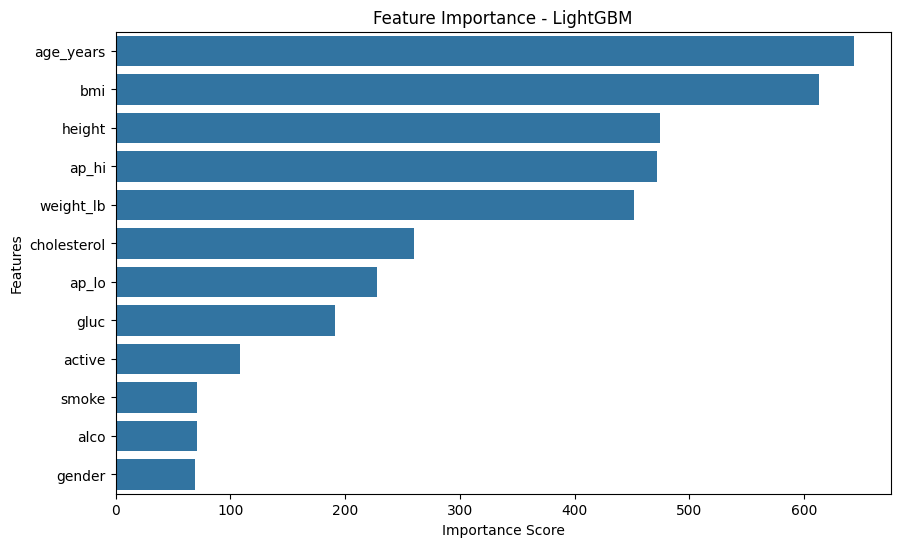

In [27]:

#Feature Importance
feature_importance = pd.Series(best_lgbm.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Feature Importance - LightGBM")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


100%|===================| 13581/13590 [01:17<00:00]       

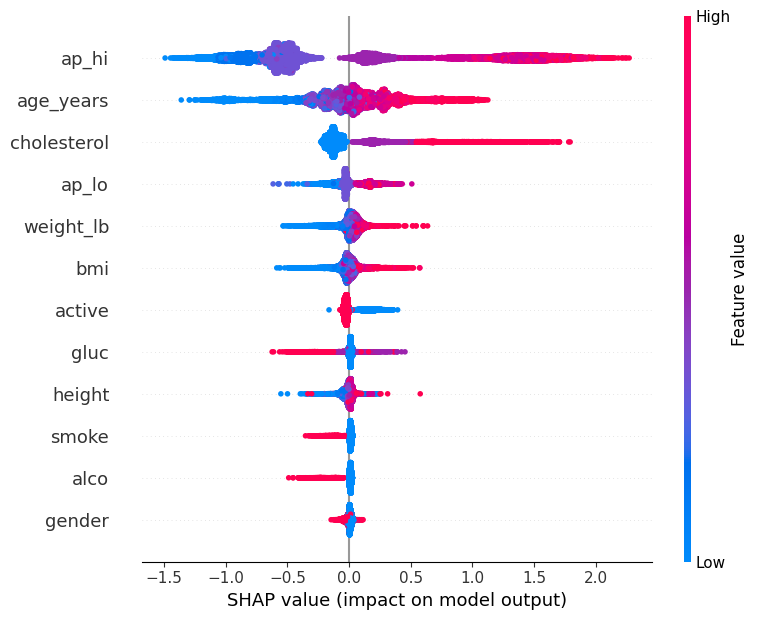

In [28]:

#SHAP model predictions
explainer = shap.Explainer(best_lgbm, X_test)
shap_values = explainer(X_test)

# Visualize SHAP Summary Plot
shap.summary_plot(shap_values, X_test)


Feature Importance for XGBoost

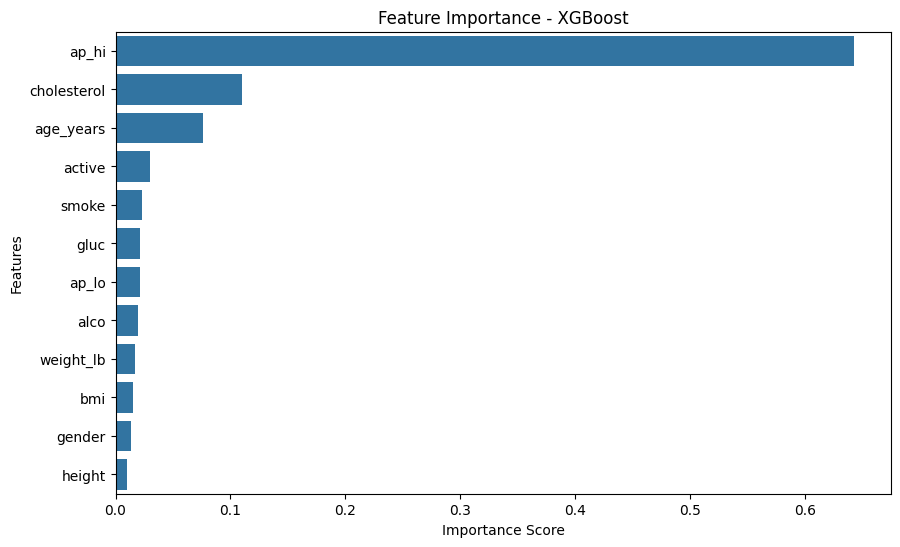

In [29]:
# Feature Importance for XGBoost
xgb_feature_importance = pd.Series(xgb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot Feature Importance for XGBoost
plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_feature_importance, y=xgb_feature_importance.index)
plt.title("Feature Importance - XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

Feature Importance for Multi-Layer Perceptron

PermutationExplainer explainer: 2001it [05:24,  6.07it/s]


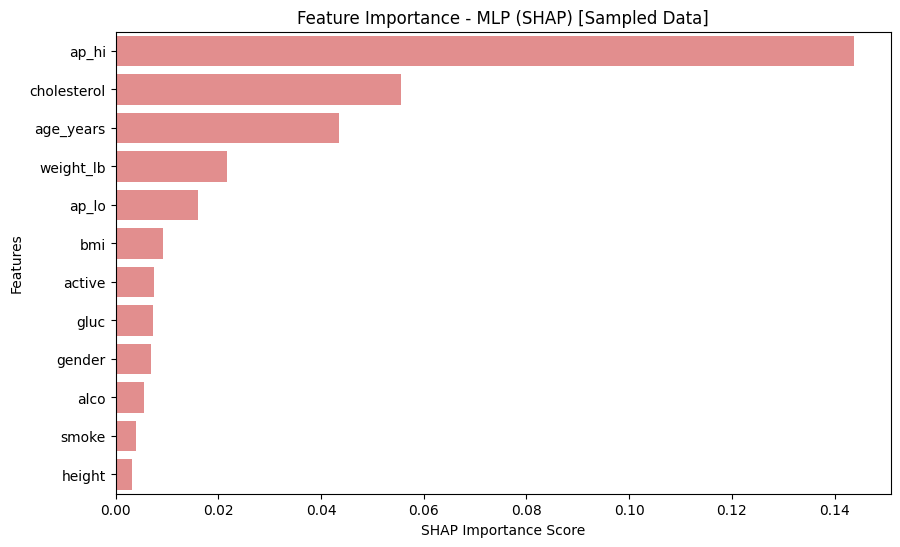

In [31]:
# Selecting a sample of the training data to speed up SHAP calculations
sample_size = 2000
X_sample = X_train_scaled[:sample_size]

# Create SHAP Explainer for MLP
explainer = shap.Explainer(mlp_model, X_sample)
shap_values = explainer(X_sample)

# Compute mean absolute SHAP values for MLP
mlp_feature_importance_shap = pd.Series(np.abs(shap_values.values).mean(axis=0), index=X_train.columns).sort_values(ascending=False)

# Plot Feature Importance for MLP using SHAP with sampled data
plt.figure(figsize=(10, 6))
sns.barplot(x=mlp_feature_importance_shap, y=mlp_feature_importance_shap.index, color="lightcoral")
plt.title("Feature Importance - MLP (SHAP) [Sampled Data]")
plt.xlabel("SHAP Importance Score")
plt.ylabel("Features")
plt.show()


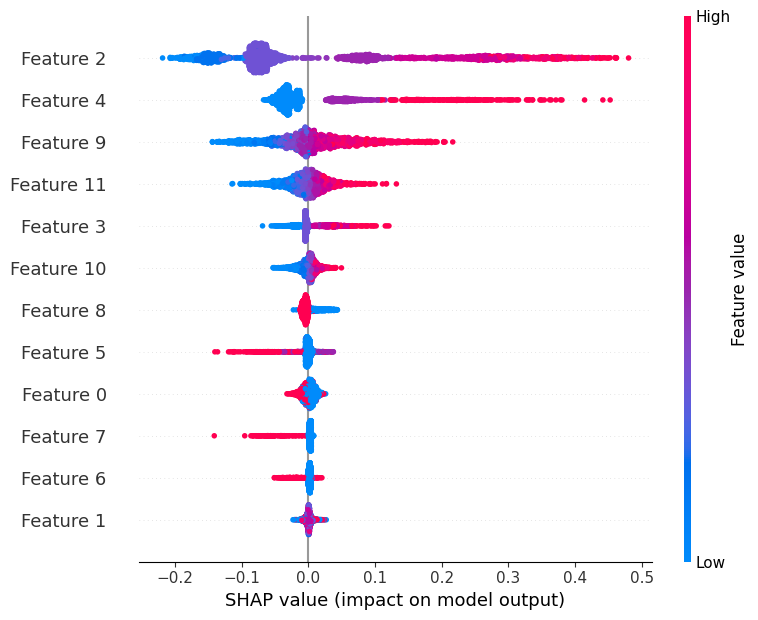

In [32]:
shap.summary_plot(shap_values, X_sample)

In [35]:
# 👉 Use this when plotting your MLP SHAP summary
shap.summary_plot(
    shap_values_mlp.values,
    X_train_reduced,  # Must be the same data used to create shap_values_mlp
    feature_names=X_train_reduced.columns.tolist(),  # 🏷 Real feature names
    show=True
)


NameError: name 'shap_values_mlp' is not defined